In [1]:
library(igraph)
library(rjson)
library(data.table)
library(ggplot2)
library(grid)



Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
#Question6
json_sfc<-fromJSON(file='data/san_francisco_censustracts.json')
attributes(json_sfc)
csv_sfc<-read.csv(file='data/san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv',header=TRUE,sep=",")
setDT(csv_sfc)
csv_sfc<-csv_sfc[month==12][, c("sourceid", "dstid", "mean_travel_time")]

$names
[1] "type"     "features"

In [3]:
temps<-json_sfc $ features
l<-length(temps)
print(l)
display_temp<-c()
x_temp<-c()
y_temp<-c()
movement_id_temp<-c()
location_temp<-list()
for(i in 1:l){
    temp=temps[[i]]
    display_temp<-c(display_temp,temp$properties$DISPLAY_NAME)
    location<-temp$geometry$coordinates
    location2<-split(unlist(location),1:2)
    x_ave=mean(location2[[1]])
    y_ave=mean(location2[[2]])
    x_temp<-c(x_temp,x_ave)
    y_temp<-c(y_temp,y_ave)
    location3<-c()
    location3<-c(location3,x_ave)
    location3<-c(location3,y_ave)
    location_temp[[i]]<-location3
    movement_id_temp<-c(movement_id_temp,temp$properties$MOVEMENT_ID)
}
g<-graph.data.frame(d=csv_sfc,directed=FALSE)

print(g)
print(vcount(g))
print(ecount(g))
display<-as.list(setNames(display_temp,movement_id_temp))
xtemp<-as.list(setNames(x_temp,movement_id_temp))
ytemp<-as.list(setNames(y_temp,movement_id_temp))
location4<-as.list(setNames(location_temp,movement_id_temp))
V(g)$DISPLAY_NAME<-display[V(g)$name]
V(g)$x1<-xtemp[V(g)$name]
V(g)$y1<-ytemp[V(g)$name]
V(g)$LOCATION<-location4[V(g)$name]
g<-simplify(g, remove.multiple=TRUE,edge.attr.comb="mean")
temp1<-components(g)
gcc<-induced.subgraph(g, which(temp1$membership==which.max(temp1$csize)))
print(gcc)
print(vcount(gcc))
print(ecount(gcc))
print(E(gcc))

[1] 2710
IGRAPH 821395a UN-- 1887 538998 -- 
+ attr: name (v/c), mean_travel_time (e/n)
+ edges from 821395a (vertex names):
 [1] 1938--1952 1747--629  1872--1919 1871--1929 81  --2319 1873--1909
 [7] 232 --809  1891--1729 2423--62   650 --1829 680 --1529 542 --2251
[13] 604 --1631 660 --1729 1329--1917 2421--82   1736--739  2021--1192
[19] 550 --2171 1721--1308 1700--1518 176 --2145 1721--889  536 --2311
[25] 74  --2466 288 --326  169 --2215 99  --2216 1755--549  646 --1211
[31] 2315--528  2322--458  2307--608  1390--111  641 --1261 1872--1946
[37] 2357--108  1454--64   1729--809  2355--128  722 --1207 2307--612 
[43] 98  --2226 1074--464  1058--624  614 --1531 151 --2395 2341--268 
+ ... omitted several edges
[1] 1887
[1] 538998
IGRAPH 840e7fa UN-- 1880 311802 -- 
+ attr: name (v/c), DISPLAY_NAME (v/x), x1 (v/x), y1 (v/x), LOCATION
| (v/x), mean_travel_time (e/n)
+ edges from 840e7fa (vertex names):
 [1] 1938--1747 1938--1872 1938--1873 1938--232  1938--1891 1938--550 
 [7] 1938--172

In [4]:
#question 11
name1 <- V(gcc)[which(V(gcc)$DISPLAY_NAME == '100 Campus Drive, Stanford')]$name
location1 <- V(gcc)[which(V(gcc)$DISPLAY_NAME == '100 Campus Drive, Stanford')]$LOCATION
print(name1)
print(location1)
name2 <- V(gcc)[which(V(gcc)$DISPLAY_NAME == '700 Meder Street, Santa Cruz')]$name
location2 <- V(gcc)[which(V(gcc)$DISPLAY_NAME == '700 Meder Street, Santa Cruz')]$LOCATION
print(name2)
print(location2)
print(vcount(gcc))

[1] "2607"
[[1]]
[1] -122.17598   37.42969

[1] "1968"
[[1]]
[1] -122.06456   36.97417

[1] 1880


In [5]:
x <- c()
y <- c()
for(i in 1:vcount(gcc)){
    x <- c(x, V(gcc)[i]$LOCATION[[1]][1])
    y <- c(y, V(gcc)[i]$LOCATION[[1]][2])
}

deldir 0.1-14

     PLEASE NOTE:  The components "delsgs" and "summary" of the
 object returned by deldir() are now DATA FRAMES rather than
 matrices (as they were prior to release 0.0-18).
 See help("deldir").
 
     PLEASE NOTE: The process that deldir() uses for determining
 duplicated points has changed from that used in version
 0.0-9 of this package (and previously). See help("deldir").




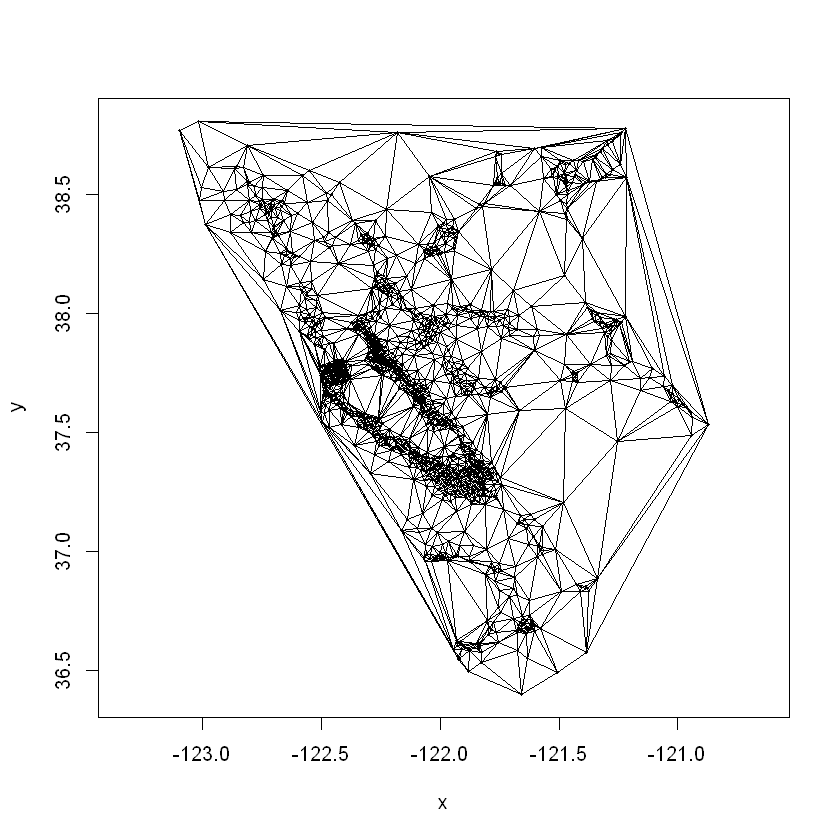

In [6]:
library(deldir)
plot(x, y, type="n", asp=1)
vtess <- deldir(x, y)
plot(vtess, wlines="triang", wpoints="none", number=FALSE, add=TRUE, lty=1)
points(x, y, pch=20, col="black", cex=0.5)


In [7]:
#print(V(gcc)[vtess$delsgs$ind1]$name)
mat <- cbind(V(gcc)[vtess$delsgs$ind1]$name, V(gcc)[vtess$delsgs$ind2]$name)
g_d <- graph_from_edgelist(mat, directed = FALSE)
print(ecount(g_d))
#plot(g_d)

[1] 5627


In [8]:
#question 12

In [9]:
#print(V(gcc)$LOCATION)
#id <- get.edge.ids(gcc, c(which(V(gcc)$name == 1938),which(V(gcc)$name == 1747)), directed = FALSE)
#print(id)
#print(E(gcc)[1]$mean_travel_time)
eid_c <- c()
flow_c <- c()
time_c <- c()
for(eid in 1:ecount(g_d)){
    v1_name <- V(g_d)[inc(E(g_d)[eid])][1]$name
    v2_name <- V(g_d)[inc(E(g_d)[eid])][2]$name
    if(get.edge.ids(gcc, c(v1_name, v2_name), directed = FALSE) != 0){
        eid_c <- c(eid_c, eid)
        eid <- get.edge.ids(gcc, c(v1_name, v2_name),directed = FALSE)
        #print(eid)
        location1_a <- V(gcc)[which(V(gcc)$name == v1_name)]$LOCATION[[1]][1]
        location1_l <- V(gcc)[which(V(gcc)$name == v1_name)]$LOCATION[[1]][2]
        location2_a <- V(gcc)[which(V(gcc)$name == v2_name)]$LOCATION[[1]][1]
        location2_l <- V(gcc)[which(V(gcc)$name == v2_name)]$LOCATION[[1]][2]
        distance <- sqrt((location1_a - location2_a)*(location1_a - location2_a) + (location1_l - location2_l)*(location1_l - location2_l))
        speed <- distance * 69.0 /(E(gcc)[eid]$mean_travel_time * 1.0)
        time_c <- c(time_c, E(gcc)[eid]$mean_travel_time)
        #print(speed)
        flow <- speed * 3600 * 2.0 / (0.003 + 2 * speed)
        print("route from:")
        print(v1_name)
        print("to:")
        print(v2_name)
        print("max flow:")
        print(flow)
        flow_c <- c(flow_c, flow)
        
    }
    
    
    #print(v1_name)
    
    #print(flow)
    
}

[1] "route from:"
[1] "1170"
[1] "to:"
[1] "2110"
[1] "max flow:"
[1] 2343.747
[1] "route from:"
[1] "2110"
[1] "to:"
[1] "2478"
[1] "max flow:"
[1] 1783.554
[1] "route from:"
[1] "1170"
[1] "to:"
[1] "2478"
[1] "max flow:"
[1] 2786.132
[1] "route from:"
[1] "2110"
[1] "to:"
[1] "2015"
[1] "max flow:"
[1] 3244.813
[1] "route from:"
[1] "2015"
[1] "to:"
[1] "2563"
[1] "max flow:"
[1] 3300.949
[1] "route from:"
[1] "2478"
[1] "to:"
[1] "2015"
[1] "max flow:"
[1] 3126.884
[1] "route from:"
[1] "2563"
[1] "to:"
[1] "847"
[1] "max flow:"
[1] 3468.182
[1] "route from:"
[1] "2015"
[1] "to:"
[1] "847"
[1] "max flow:"
[1] 3435.256
[1] "route from:"
[1] "847"
[1] "to:"
[1] "1161"
[1] "max flow:"
[1] 3319.419
[1] "route from:"
[1] "406"
[1] "to:"
[1] "1444"
[1] "max flow:"
[1] 3036.883
[1] "route from:"
[1] "406"
[1] "to:"
[1] "313"
[1] "max flow:"
[1] 2718.745
[1] "route from:"
[1] "1444"
[1] "to:"
[1] "1988"
[1] "max flow:"
[1] 2913.694
[1] "route from:"
[1] "406"
[1] "to:"
[1] "1988"
[1] "max 

In [11]:
#question 13
print(length(eid_c))

[1] 5267


In [12]:
g <- set_edge_attr(g_d, 'capacity', eid_c, flow_c)

In [14]:
#source
print(which(V(g)$name == 2607))
#end
print(which(V(g)$name == 1968))

[1] 848
[1] 109


In [24]:
g <- delete.edges(g2, which(is.na(E(g2)$weight)))
max_flow <- max_flow(g, which(V(g)$name == 2607),which(V(g)$name == 1968))
print(max_flow$value)


[1] 14891.56


In [25]:
path <- vertex_disjoint_paths(g, which(V(g)$name == 2607),which(V(g)$name == 1968))
print(path)

[1] 4


In [28]:
print(ecount(g))

[1] 5267


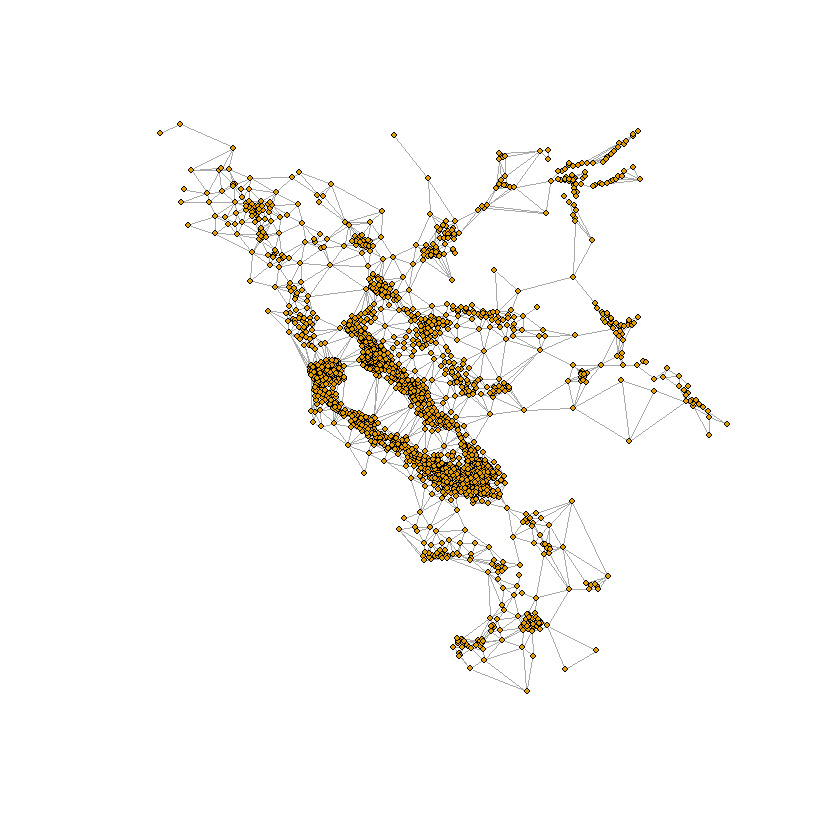

In [148]:
r <- c()
for(i in 1:vcount(g)){
    x <- V(gcc)[which(V(gcc)$name == V(g)[i]$name)]$LOCATION[[1]][1]
    y <- V(gcc)[which(V(gcc)$name == V(g)[i]$name)]$LOCATION[[1]][2]
    r <- rbind(r,c(x,y))
}
plot(g, layout = r, vertex.size=2, vertex.label = NA,
edge.arrow.size=0.1,vertex.label.color = "black")

In [66]:
#question 14
g2 <- set_edge_attr(g, 'weight', eid_c, time_c)
#print(V(g2)$name)
g3 <- delete.edges(g2, which(E(g2)$weight >= 870))
r <- c()
for(i in 1:vcount(g3)){
    x <- V(gcc)[which(V(gcc)$name == V(g3)[i]$name)]$LOCATION[[1]][1]
    y <- V(gcc)[which(V(gcc)$name == V(g3)[i]$name)]$LOCATION[[1]][2]
    r <- rbind(r,c(x,y))
}
#print(r)

#print(V(g3)$name)
#print(E(g3)$weight)

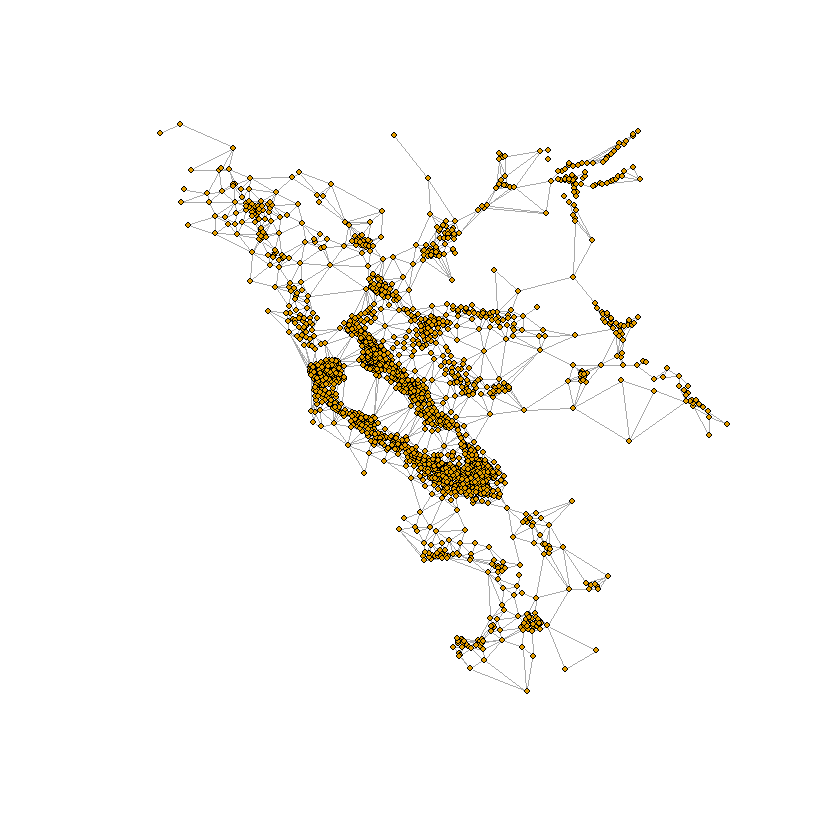

In [100]:
plot(g3, layout = r, vertex.size=2, vertex.label = NA,
edge.arrow.size=0.1,vertex.label.color = "black")
#points(c(-122.475, -122.985), c(37.806, 37.568), pch=19, col="red", cex = 4)

In [163]:
location <- c()
for(i in 1:vcount(g3)){
    location <- c(location, round(c(V(gcc)[which(V(gcc)$name == V(g3)[i]$name)]$LOCATION[[1]]), 3))
}


In [217]:
#print(location[1])
inds <- which(location == -122.481)
inds2 <- which(location == 37.831)
ind <- inds%/%2
ind2 <- inds2%/%2
print(ind)
print(ind2)
print(V(g3)[1018]$name)
#location 1 1
print('start location of bridge 1 is 1677')


[1]  794  890  910 1167
[1] 1255 1368
[1] "1677"
[1] "start location of bridge 1 is 1677"


In [69]:
print(ecount(g3))

[1] 5145


In [70]:
#question 15
max_flow <- max_flow(g3, which(V(g)$name == 2607),which(V(g3)$name == 1968))
print(max_flow$value)
path <- vertex_disjoint_paths(g3, which(V(g3)$name == 2607),which(V(g3)$name == 1968))
print(path)

[1] 14891.56
[1] 4


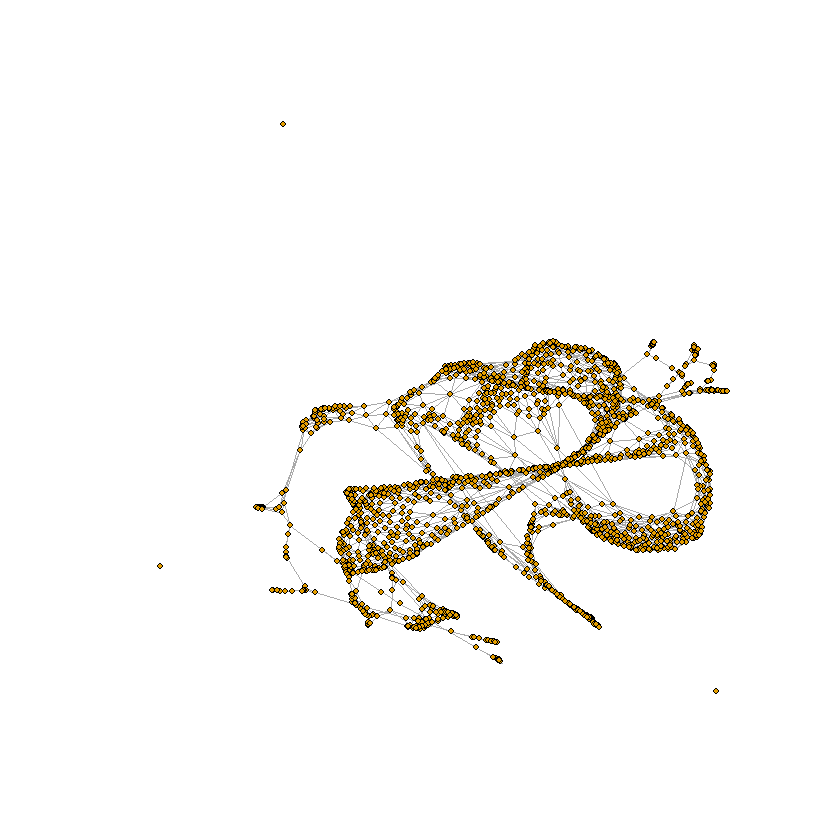

In [102]:
V(g3)$color
plot(g3, layout = r, vertex.size=2, vertex.label = NA,
edge.arrow.size=0.1,vertex.label.color = "black")
#points(c(-122.475, -122.985), c(37.806, 37.568), pch=19, col="red", cex = 4)